In [0]:
#import all modules
import numpy as np
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [0]:
#ensure that we have the same output, use this random seed
np.random.seed(7)

These are sample train inputs: 



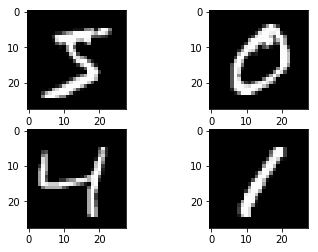

In [5]:
#Use the dataset. Mnist from Keras gives out two tuples for training and test
(X_train,y_train), (X_test,y_test) = mnist.load_data()

print("These are sample train inputs: \n")
#check the outputs
plt.subplot(221)
plt.imshow(X_train[0], cmap = plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap = plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap = plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap = plt.get_cmap('gray'))






 These are sample test inputs: 



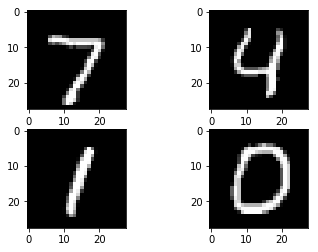

In [6]:
print("\n\n These are sample test inputs: \n")
plt.subplot(221)
plt.imshow(X_test[0], cmap = plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_test[4], cmap = plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_test[5], cmap = plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_test[10], cmap = plt.get_cmap('gray'))

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
X_train.shape

(60000, 28, 28)

In [0]:
#flatten the pixels into 784 inputs instead of 28x28 pixels
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [0]:
#Do batch normalization as part of optimization
X_train = X_train/255
X_test = X_test/255

In [0]:
#onehot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1] # or you can do y_train.shape[1]

In [0]:
#define baseline model

def baseline_model(input_units, input_dim, activation, output_units, optimizer):
  #This is where you use the keras models
  # We will build with one hidden layer as the baseline model
  model = Sequential()
  model.add(Dense(input_units, input_dim = input_dim, kernel_initializer="normal", activation=activation))
  model.add(Dense(20, kernel_initializer="normal", activation="relu"))
  model.add(Dense(output_units, kernel_initializer="normal", activation="softmax"))
  #compile the model
  model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
  return model

In [23]:
#build the model

model = baseline_model(num_pixels,num_pixels,'relu',num_classes,'adam')
#fit the model
model.fit(X_train,y_train, validation_data = (X_test,y_test), epochs = 10,\
          batch_size=200,verbose = 2)

#evaluate the model
scores = model.evaluate(X_test,y_test,verbose=0)

print("Baseline error: %.2f%%" % (100 - scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 2s - loss: 0.4184 - acc: 0.8839 - val_loss: 0.1918 - val_acc: 0.9449
Epoch 2/10
 - 1s - loss: 0.1556 - acc: 0.9548 - val_loss: 0.1426 - val_acc: 0.9593
Epoch 3/10
 - 1s - loss: 0.1018 - acc: 0.9704 - val_loss: 0.0934 - val_acc: 0.9722
Epoch 4/10
 - 1s - loss: 0.0737 - acc: 0.9785 - val_loss: 0.0811 - val_acc: 0.9752
Epoch 5/10
 - 1s - loss: 0.0550 - acc: 0.9839 - val_loss: 0.0723 - val_acc: 0.9777
Epoch 6/10
 - 1s - loss: 0.0439 - acc: 0.9870 - val_loss: 0.0704 - val_acc: 0.9783
Epoch 7/10
 - 1s - loss: 0.0326 - acc: 0.9906 - val_loss: 0.0624 - val_acc: 0.9812
Epoch 8/10
 - 1s - loss: 0.0246 - acc: 0.9933 - val_loss: 0.0645 - val_acc: 0.9806
Epoch 9/10
 - 1s - loss: 0.0193 - acc: 0.9946 - val_loss: 0.0666 - val_acc: 0.9804
Epoch 10/10
 - 1s - loss: 0.0156 - acc: 0.9957 - val_loss: 0.0716 - val_acc: 0.9788
Baseline error: 2.12%


In [18]:
#Lets try to predict
np.argmax(model.predict(X_test)[0])

7

## Try it youself!

1. write a number on a piece of white paper, scan/take a picture
2. convert the image to a 8 bit pixel image and then resize it 28 x 28 pixels
3. Make sure the format is in an array, follow instructions below to see how it is done
4. use model.predict to get the answer

For items number 2 and 3, there are several methods for you to achieve it:
- By using pypng to read and manipulate png type images: [Read-the-docs: PyPng](https://pypng.readthedocs.io/en/latest/ex.html)
- Use Image module from PIL package and then consequently use np.resize as is done in this [Medium post](https://medium.com/@ashok.tankala/build-the-mnist-model-with-your-own-handwritten-digits-using-tensorflow-keras-and-python-f8ec9f871fd3)
- Use PIL and Matplotlib as below sample

```python
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
data = image.imread('opera_house.jpg')
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
```
The code above will display the data type as 8 bit unsigned integer as what we want. To resize image and convert to grayscale (assuming you used some color pencils to color the digit), you can use the code below:

```python
# load image and convert to and from NumPy array
from PIL import Image
from numpy import asarray
# load the image
image = Image.open('opera_house.jpg')
# resize image and ignore original aspect ratio
img_resized = image.resize((28,28))
# convert the image to grayscale
gs_image = img_resized.convert(mode='L')
# convert image to numpy array
data = asarray(gs_image)
# summarize shape
print(data.shape)
```

### ALL the best!!